In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0,0.5,'second feature')

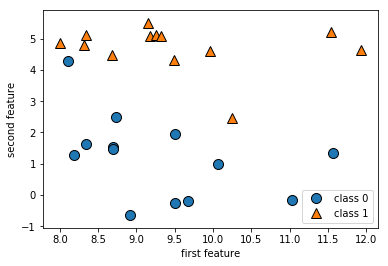

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')

yは[1, 0, 1.....]の真偽値のようなもので１の時の場合三角になり０の時は丸のままである

In [3]:
X.shape

(26, 2)

In [4]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [5]:
X[:, 0]

array([ 9.96346605, 11.0329545 , 11.54155807,  8.69289001,  8.1062269 ,
        8.30988863, 11.93027136,  9.67284681,  8.34810316,  8.67494727,
        9.17748385, 10.24028948,  8.68937095,  8.92229526,  9.49123469,
        9.25694192,  7.99815287,  8.18378052,  8.7337095 ,  9.32298256,
       10.06393839,  9.50048972,  8.34468785,  9.50169345,  9.15072323,
       11.563957  ])

In [6]:
X[:, 1]

array([ 4.59676542, -0.16816717,  5.21116083,  1.54322016,  4.28695977,
        4.80623966,  4.64866327, -0.20283165,  5.13415623,  4.47573059,
        5.09283177,  2.45544401,  1.48709629, -0.63993225,  4.33224792,
        5.13284858,  4.8525051 ,  1.29564214,  2.49162431,  5.09840649,
        0.99078055, -0.26430318,  1.63824349,  1.93824624,  5.49832246,
        1.3389402 ])

In [7]:
y.shape

(26,)

In [8]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

# 回帰

Text(0,0.5,'target')

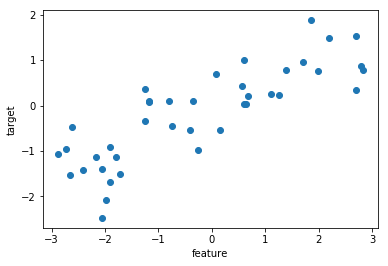

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlabel('feature')
plt.ylabel('target')

In [10]:
from sklearn.datasets import  load_breast_cancer
cancer = load_breast_cancer()
print(f'cancer_key: {cancer.keys()}')

cancer_key: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
cancer.data.shape

(569, 30)

In [12]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
np.bincount(cancer.target)

array([212, 357])

In [14]:
num = np.array([2, 2, 3, 4])
np.bincount(num)

array([0, 0, 2, 1, 1])

In [15]:
print('sample count class {}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample count class {'malignant': 212, 'benign': 357}


In [16]:
print('feature names {}'.format(cancer.feature_names))

feature names ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [18]:
from sklearn.datasets import  load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [19]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [20]:
X[:, 0]

array([0.00000000e+00, 2.35922539e-04, 2.35697744e-04, 2.92795719e-04,
       7.05070075e-04, 2.64471527e-04, 9.21323037e-04, 1.55367187e-03,
       2.30325139e-03, 1.84017333e-03, 2.45667410e-03, 1.24929920e-03,
       9.83029313e-04, 7.00731528e-03, 7.09948131e-03, 6.98067706e-03,
       1.17748838e-02, 8.74318365e-03, 8.95123159e-03, 8.08678173e-03,
       1.39987825e-02, 9.50568889e-03, 1.37816304e-02, 1.10386796e-02,
       8.36170623e-03, 9.37643166e-03, 7.48107112e-03, 1.06715891e-02,
       8.61718595e-03, 1.11962610e-02, 1.26389965e-02, 1.51556909e-02,
       1.55296377e-02, 1.28740198e-02, 1.80566727e-02, 6.50220052e-04,
       1.02416683e-03, 8.29719002e-04, 1.89648452e-03, 2.39519262e-04,
       3.06508225e-04, 1.36135960e-03, 1.51939061e-03, 1.72013270e-03,
       1.30797074e-03, 1.85568419e-03, 2.04608571e-03, 2.50590425e-03,
       2.78240231e-03, 2.39912654e-03, 9.26268530e-04, 4.16433067e-04,
       5.31415800e-04, 4.88817114e-04, 8.18254447e-05, 7.63179629e-05,
      

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


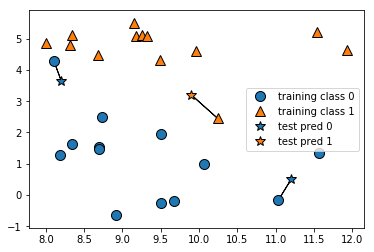

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


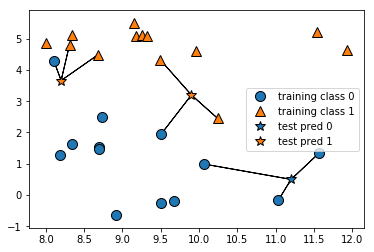

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [23]:
from sklearn.model_selection import  train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
from sklearn.neighbors import  KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
print('test set prediction {}'.format(clf.predict(X_test)))

test set prediction [1 0 1 0 1 0 0]


In [27]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [28]:
X_test

array([[11.54155807,  5.21116083],
       [10.06393839,  0.99078055],
       [ 9.49123469,  4.33224792],
       [ 8.18378052,  1.29564214],
       [ 8.30988863,  4.80623966],
       [10.24028948,  2.45544401],
       [ 8.34468785,  1.63824349]])

In [29]:
clf.score(X_test, y_test)

0.8571428571428571

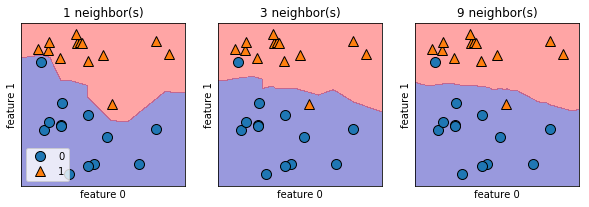

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

trainscore 1.0
testscore 0.9020979020979021
trainscore 0.9765258215962441
testscore 0.8881118881118881
trainscore 0.9577464788732394
testscore 0.9230769230769231
trainscore 0.9553990610328639
testscore 0.9230769230769231
trainscore 0.9483568075117371
testscore 0.9230769230769231
trainscore 0.9460093896713615
testscore 0.9370629370629371
trainscore 0.9436619718309859
testscore 0.9300699300699301
trainscore 0.9413145539906104
testscore 0.9300699300699301
trainscore 0.9342723004694836
testscore 0.916083916083916
trainscore 0.9389671361502347
testscore 0.916083916083916


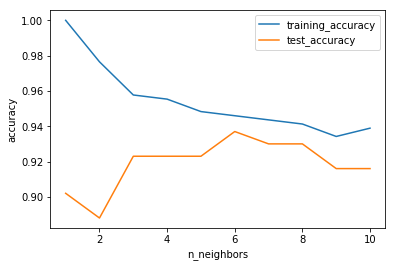

In [31]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    print('trainscore', clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    print('testscore', clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

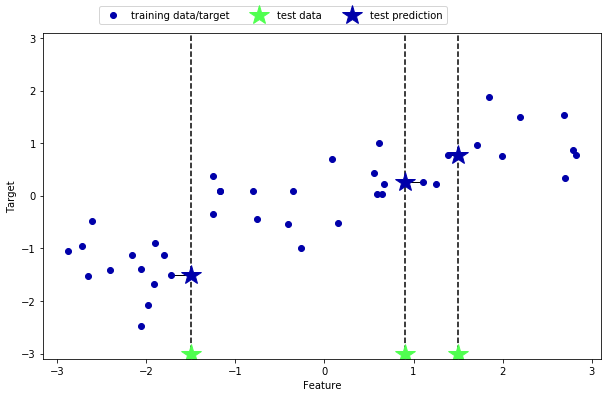

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

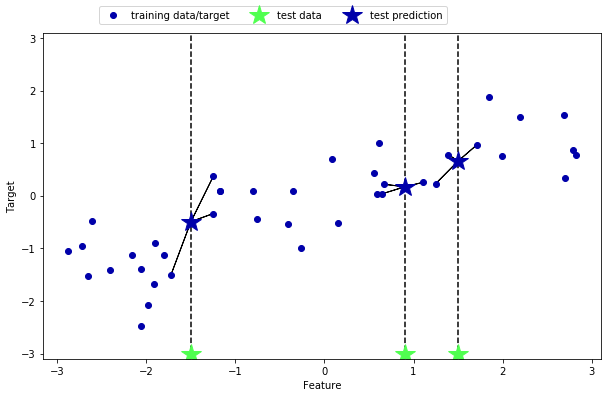

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [34]:
from sklearn.neighbors import  KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ３つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print('test set prediction: {}'.format(reg.predict(X_test)))

test set prediction: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [35]:
print('test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

test set R^2: 0.83


# KNeighborsRegressorの解析

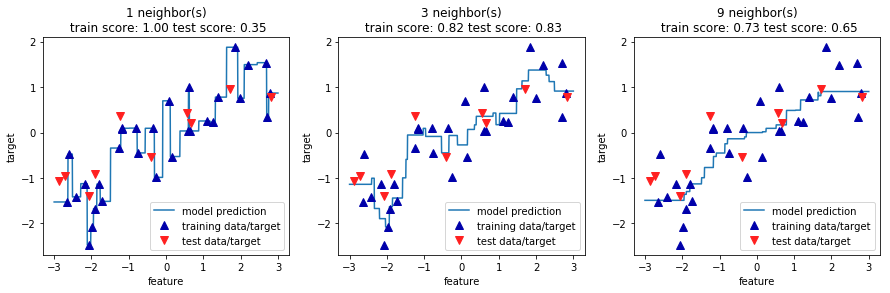

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line=np.linspace(-3, 3, 1000).reshape(-1, 1)
i = 0
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), 
                                                                        reg.score(X_test, y_test)))
    
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    axes[i].legend(['model prediction', 'training data/target', 'test data/target'], loc='best')
    i = i + 1

# 線形モデル

- 回帰問題は、線形モデルにより一般的な予測式
- y = w[0]*x[0]+w[1]*x[1]+・・・+w[p]*x[p]+b　　　特徴量p+1個
- y = w[0]*x[0]+b    特徴量が一つ

w[0]: 0.393906  b: -0.031804


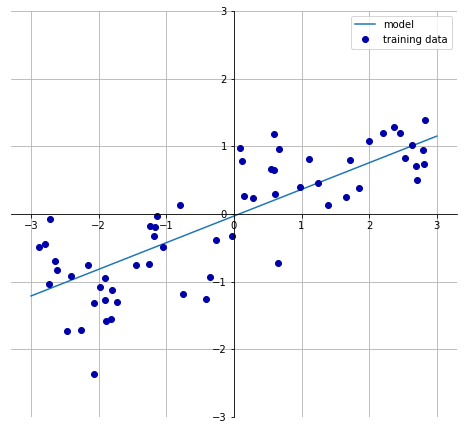

In [37]:
mglearn.plots.plot_linear_regression_wave()

In [38]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

r = LinearRegression().fit(X_train, y_train)

In [39]:
print('r.coef {}'.format(r.coef_))
print('r.intercept_ {}'.format(r.intercept_))

r.coef [0.39390555]
r.intercept_ -0.031804343026759746


In [40]:
print('training set score: {:.2f}'.format(r.score(X_train, y_train)))
print('test set score: {:.2f}'.format(r.score(X_test, y_test)))

training set score: 0.67
test set score: 0.66


In [41]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=0)
Ir = LinearRegression().fit(X_train, y_train)

In [42]:
print('training set score: {:.2f}'.format(Ir.score(X_train, y_train)))
print('test set socre: {:.2f}'.format(Ir.score(X_test, y_test)))

training set score: 0.95
test set socre: 0.61


# リッジ回帰

In [43]:
from sklearn.linear_model import  Ridge

ridge = Ridge().fit(X_train, y_train)
print('training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

training set score: 0.89
test set score: 0.75


In [44]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

training set score: 0.79
test set score: 0.64


In [45]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

training set score: 0.93
test set score: 0.77


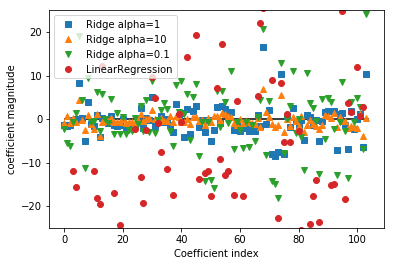

In [46]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_ , '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(Ir.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0, 0, len(Ir.coef_))
plt.ylim(-25, 25)
plt.legend()

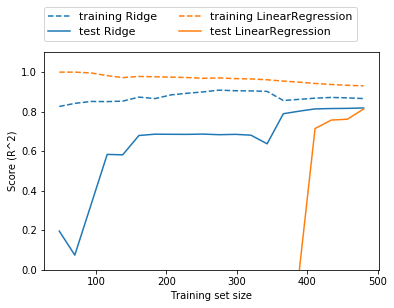

In [47]:
mglearn.plots.plot_ridge_n_samples()

- 十分な訓練データがある場合には、正規化はあまり重要ではない。十分なデータがある場合ならばリッジ回帰と線形回帰は同じ性能を示す。（ここでこれが全てのデータを使った時に起きているのは偶然である）

# lasso

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('training set score; {:.2f}'.format(lasso.score(X_train, y_train)))
print('test set svcore: {:.2f}'.format(lasso.score(X_test, y_test)))
print('number og feature used: {}'.format(np.sum(lasso.coef_ != 0)))

training set score; 0.29
test set svcore: 0.21
number og feature used: 4


In [49]:
# 'max iter'の値を増やしている
# こうしておかないとモデルが'max iter'を増やすように警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('training set score; {:.2f}'.format(lasso001.score(X_train, y_train)))
print('test set svcore: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('number og feature used: {}'.format(np.sum(lasso001.coef_ != 0)))

training set score; 0.90
test set svcore: 0.77
number og feature used: 33


In [50]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('training set score; {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('test set svcore: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('number og feature used: {}'.format(np.sum(lasso00001.coef_ != 0)))

training set score; 0.95
test set svcore: 0.64
number og feature used: 96


- alphaを小さくしすぎるとリッジの場合と同様に正規化の効果が薄れ過剰適合が発生し性能はlinerRegressionと似たようになる

(-25, 25)

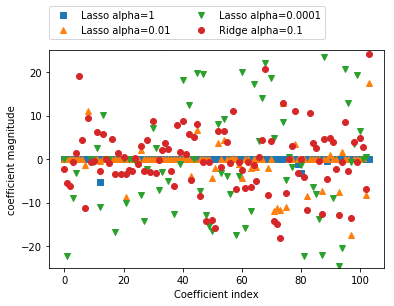

In [51]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_ , '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel('Coefficient index')
plt.ylabel('coefficient magnitude')
plt.ylim(-25, 25)


# クラス分類のための線形モデル

- ２クラス分類の予測式
- y = w[0]*x[0]+w[1]*x[1]+・・・+w[p]*x[p]+b > 0

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


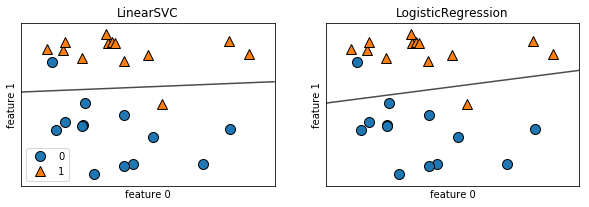

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

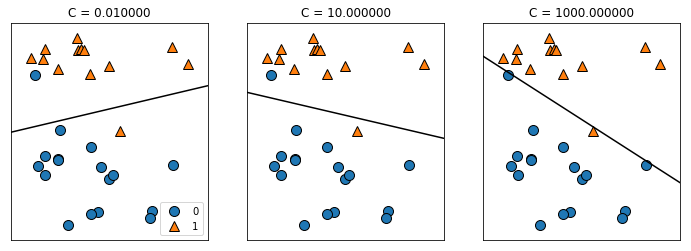

In [53]:
mglearn.plots.plot_linear_svc_regularization()

In [54]:
from sklearn.datasets import  load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('training set score; {:.3f}'.format(logreg.score(X_train, y_train)))
print('test set svcore: {:.3f}'.format(logreg.score(X_test, y_test)))

training set score; 0.953
test set svcore: 0.958


/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

training set score: 0.972
test set score: 0.965


/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))

training set score: 0.934
test set score: 0.930


/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


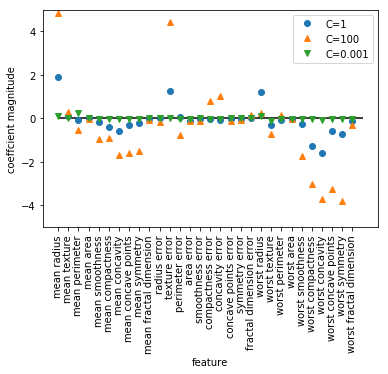

In [57]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coeffcient magnitude')
plt.legend()

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accuracy of l1 logreg with C=0.001: 0.91
test accuracy of l1 logreg with C=0.001: 0.92
training accuracy of l1 logreg with C=1.000: 0.96
test accuracy of l1 logreg with C=1.000: 0.96
training accuracy of l1 logreg with C=100.000: 0.99
test accuracy of l1 logreg with C=100.000: 0.98


/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


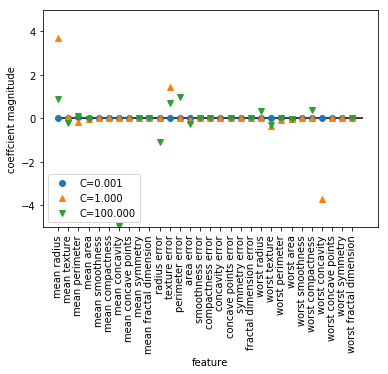

In [58]:
# L1正規化
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coeffcient magnitude')
plt.legend(loc=3)

# 線形モデルによる多クラス分類

多くの線形クラス分類モデルは２クラス分離にしか適用できず、自然に多クラスの場合に拡張できるものではない（ロジスティック回帰は例外）

確信度を表す式の値が最も大きいクラスがクラスラベルとなる
- w[0] * x[0] + w[1] * x[1] + ・・・ + w[p] * x[p]+b

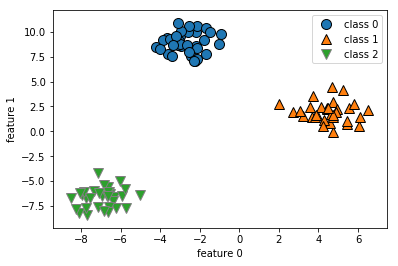

In [59]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [60]:
liner_svm = LinearSVC().fit(X, y)
print('coefficient shape:  {}'.format(liner_svm.coef_.shape))
print('intercept shape: {}'.format(liner_svm.intercept_.shape))

coefficient shape:  (3, 2)
intercept shape: (3,)


In [61]:
liner_svm.coef_[0]

array([-0.17492099,  0.23140321])

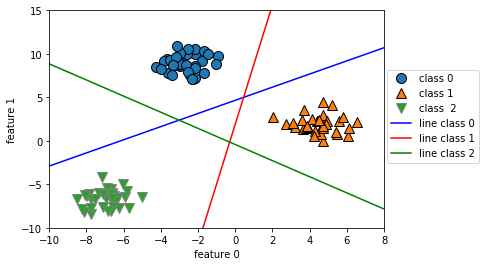

In [62]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15) # 等間隔リストの作成
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) # 一次関数の作成とプロット
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class  2', 'line class 0', 'line class 1', 'line class 2'], loc=[1.01, 0.3])

- ylim, xlimはプロットするときの軸の目盛りである

Text(0,0.5,'feature 1')

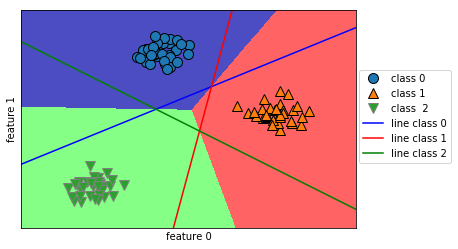

In [63]:
mglearn.plots.plot_2d_classification(liner_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) # 一次関数の作成とプロット
plt.legend(['class 0', 'class 1', 'class  2', 'line class 0', 'line class 1', 'line class 2'], loc=[1.01, 0.3])
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# メソッドチェーン

In [64]:
# 一行でモデルのインスタンスを生成して、訓練する
logreg = LinearRegression().fit(X_train, y_train)
# 複数のメソッド呼び出し（_init_   fit）を続けて書くことを、メソッドチェーンと呼ぶ。
# scikit-learnではfitとpredictに対してメソッドチェーンがよく使われる
logreg = LinearRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)
# さらにモデルのインスタンスの生成と訓練と予測を偉業で書くこともできる
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)
# 一行で書くことはあまり理想的ではない　　理由（訓練したモデルはどこにも格納されない、それを使って別のデータを予測することもできないから）

# ナイーブベイズクラス分類機

線形モデルによく似たクラス分類機の一族。くれんが線形モデルよりもさらに高速なのが特徴である。この速度の代償として、ナイーブベイズモデルの汎化性能は、logisticregressionやlinerSVCよりもわずかに劣る場合が多い。

In [65]:
X = np.array([[0, 1, 0, 1],
                        [1, 0, 1, 1], 
                        [0, 0, 0, 1],
                        [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [66]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('feature counts : {}'.format(counts))

feature counts : {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [67]:
X[y == 0]

array([[0, 1, 0, 1],
       [0, 0, 0, 1]])

In [68]:
y == 0

array([ True, False,  True, False])

# 決定木

- 決定木はクラス分類と回帰分類に広く使われているモデルである。決定木ではyes/noで答えられる質問で構成された階層的な木構造を学習する

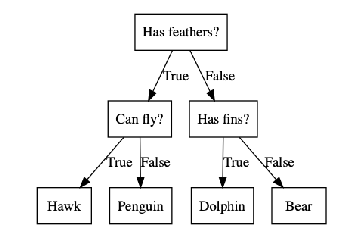

In [69]:
mglearn.plots.plot_animal_tree()

## 決定木の構築

- 決定木を構築する際、アルゴリズムは全ての可能なテスト（質問）の中から、目的変数に応じて最も情報量の多いものを選ぶ。

- 個々のノードはテストに対応する。

- データの再帰分割は対象の領域（決定木の葉）に一つの対象値（１クラス、もしくは一つの回帰値）しか含まれなくなるまで繰り返される。
 - 一つの対象値のデータポイントしか含まないような決定木の葉を'純粋(pure)'と呼ぶ。

葉が純粋になるまで木を育てる

In [70]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('accuracy on ttest set: {:.3f}'.format(tree.score(X_test, y_test)))

accuracy on training set: 1.000
accuracy on ttest set: 0.937


In [71]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('accuracy on ttest set: {:.3f}'.format(tree.score(X_test, y_test)))

accuracy on training set: 0.988
accuracy on ttest set: 0.951


- 決定木の深さに制約を与えないと、決定木はいくらでも深く、複雑になる。したがって枝刈り仮されていない木は過剰適合しやすく、新しいデータに対する汎化性能が低い傾向にある。上記ではmax_depthを４とすることによって木の成長を止めている。よってテストスコアが前のよりも高くなっている。これでわかることは汎化性能が前のやつよりも高いということ。

## 決定木の解析

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

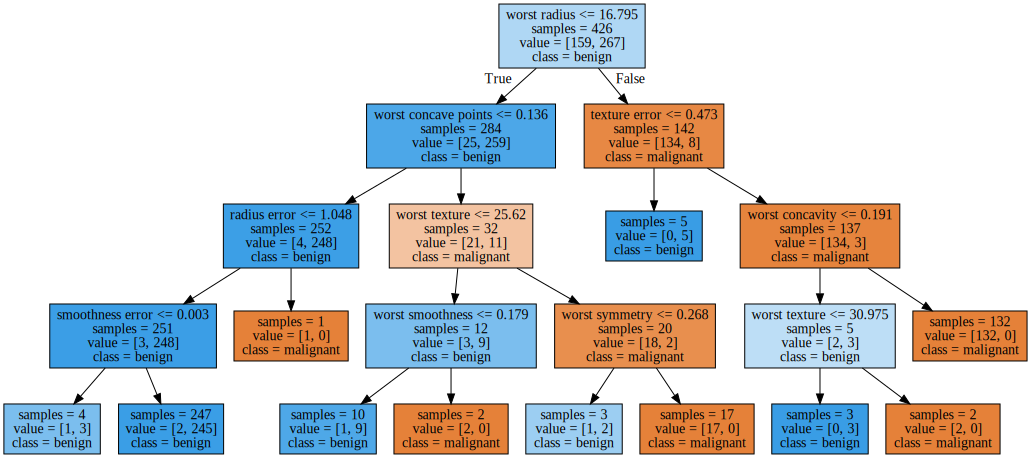

In [73]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [74]:
print('feature importance :\n{}'.format(tree.feature_importances_))

feature importance :
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


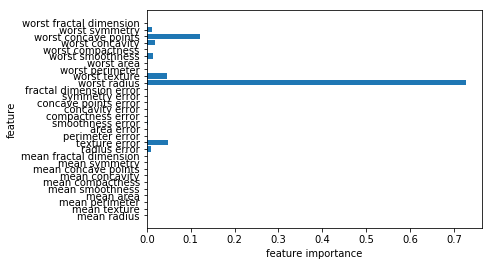

In [75]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1] # 特徴数
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    
plot_feature_importance_cancer(tree)

plot.barhはその名前の通りplot.barを横にしただけだがbarhの第一引数ではy軸、第二引数ではx軸のように表示される

Feature importances: [0. 1.]


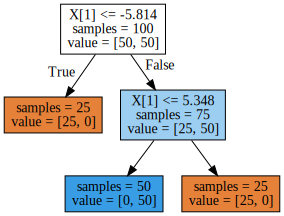

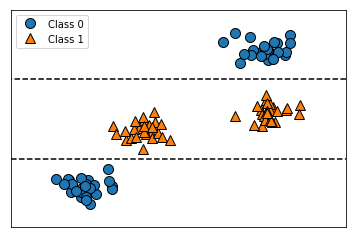

In [76]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0,0.5,'price in $/mbyte')

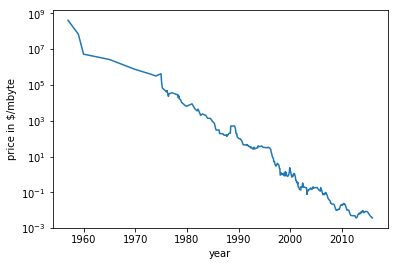

In [77]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price in $/mbyte')

In [78]:
from sklearn.tree import  DecisionTreeRegressor
# 過去のデータを用いて2000年以降の価格を予測する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
X_train = data_train.date[:, np.newaxis] # 次元数を１次元から２次元に増やす
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
liner_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予測
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = liner_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

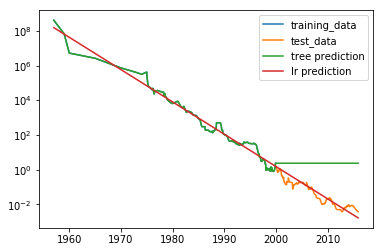

In [79]:
plt.semilogy(data_train.date, data_train.price, label='training_data')
plt.semilogy(data_test.date, data_test.price, label='test_data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='lr prediction')
plt.legend()

- 決定木は訓練データにない領域に関しては、「新しい」答えを生成することができない。この欠点は、決定木に基づく全てのモデルに共通する
- 過剰適合を防ぐには事前枝刈りを戦略を指定するmax_depth、max_leaf_nodes、min_sample_leafのどれか一つを選ぶだけで良い

## 決定木のアンサンブル法

- アンサンブル法とは複数の機械学習モデルを食い合わせることで、より効力なモデルを構築する方法。
- ランダムフォレスト、勾配ブースティング決定木

### ランダムフォレストの解析

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

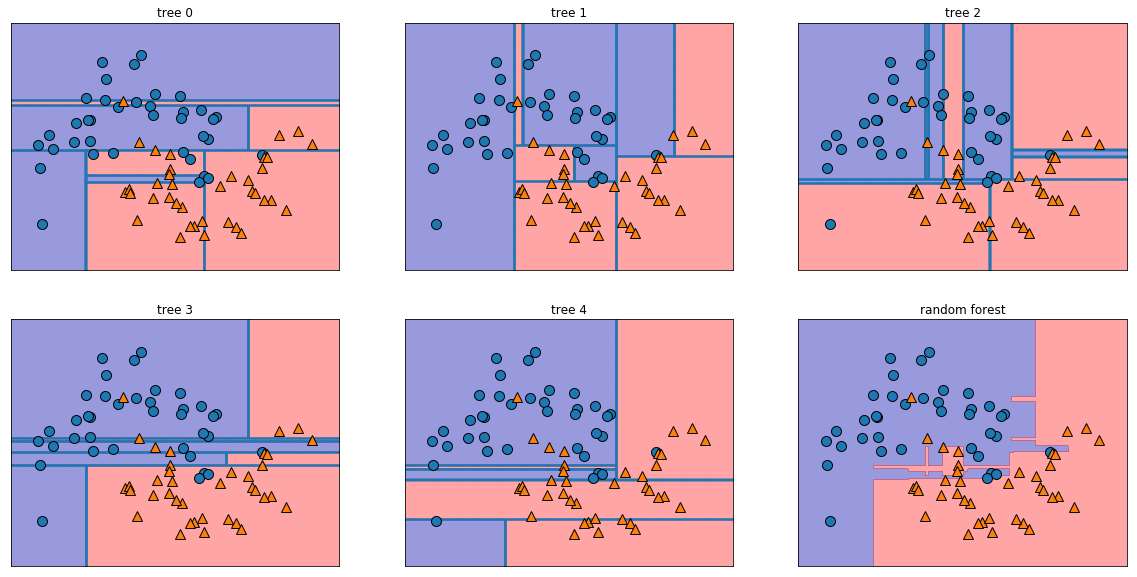

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
fprest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

accuracy on training set: 0.988
accuracy on test set: 0.937


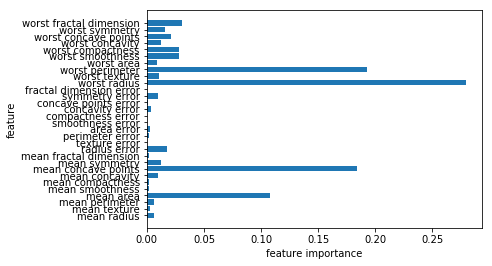

In [83]:
plot_feature_importance_cancer(forest)

### 勾配ブースティング回帰木

In [84]:
from sklearn.ensemble import  GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('acuracy training set : {:.3f}'.format(gbrt.score(X_train, y_train)))
print('accuracy test set : {:.3f}'.format(gbrt.score(X_test, y_test)))

acuracy training set : 1.000
accuracy test set : 0.958


In [85]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('acuracy training set : {:.3f}'.format(gbrt.score(X_train, y_train)))
print('accuracy test set : {:.3f}'.format(gbrt.score(X_test, y_test)))

acuracy training set : 0.991
accuracy test set : 0.972


In [86]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('acuracy training set : {:.3f}'.format(gbrt.score(X_train, y_train)))
print('accuracy test set : {:.3f}'.format(gbrt.score(X_test, y_test)))

acuracy training set : 0.988
accuracy test set : 0.965


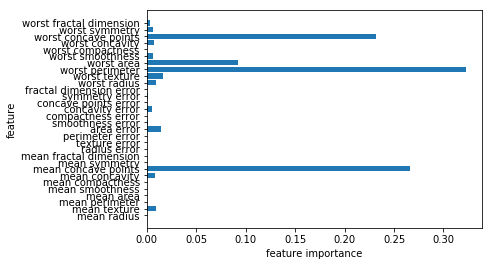

In [87]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance_cancer(gbrt)

# カーネル法を用いたサポートベクタマシン

Text(0,0.5,'feature 1')

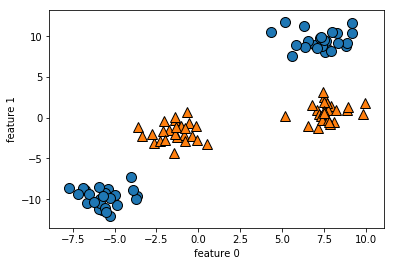

In [88]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'feature 1')

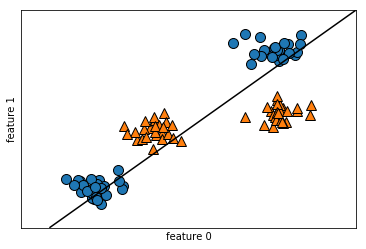

In [89]:
from sklearn.svm import LinearSVC
liner_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(liner_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0.5,0,'feature 2')

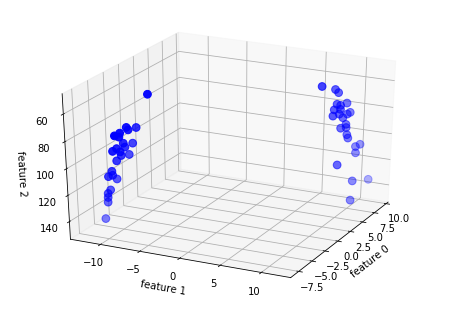

In [90]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 2')

/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5,0,'feature 2')

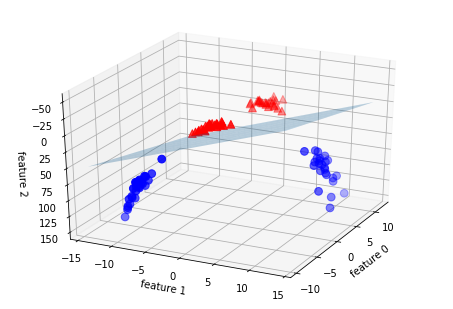

In [91]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',marker='^',  cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 2')

Text(0,0.5,'feature 1')

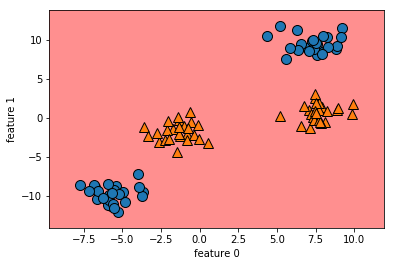

In [92]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# SVMを理解する

Text(0,0.5,'feature 1')

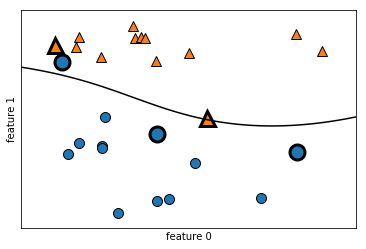

In [93]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

## SVMパラメータの調整

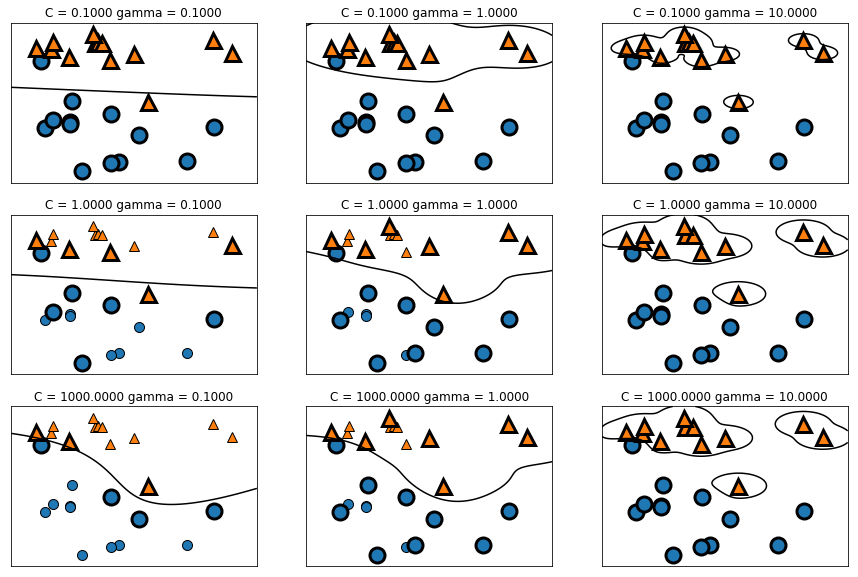

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc=SVC()

svc.fit(X_train, y_train)

print('accuracy on training set score: {:.3f}'.format(svc.score(X_train, y_train)))
print('accuracy on test set score: {:.3f}'.format(svc.score(X_test, y_test)))

accuracy on training set score: 1.000
accuracy on test set score: 0.629


/Users/tsurusekazuki/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [107]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training

print('minimum for each scaled{}'.format(X_train_scaled.min(axis=0)))
print('maximum for each scaled{}'.format(X_train_scaled.max(axis=0)))

minimum for each scaled[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximum for each scaled[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# ニューラルネットワークのチューニング

Text(0,0.5,'feature 1')

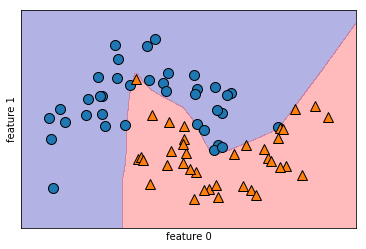

In [112]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
